# NBA VERİ ANALİZİ

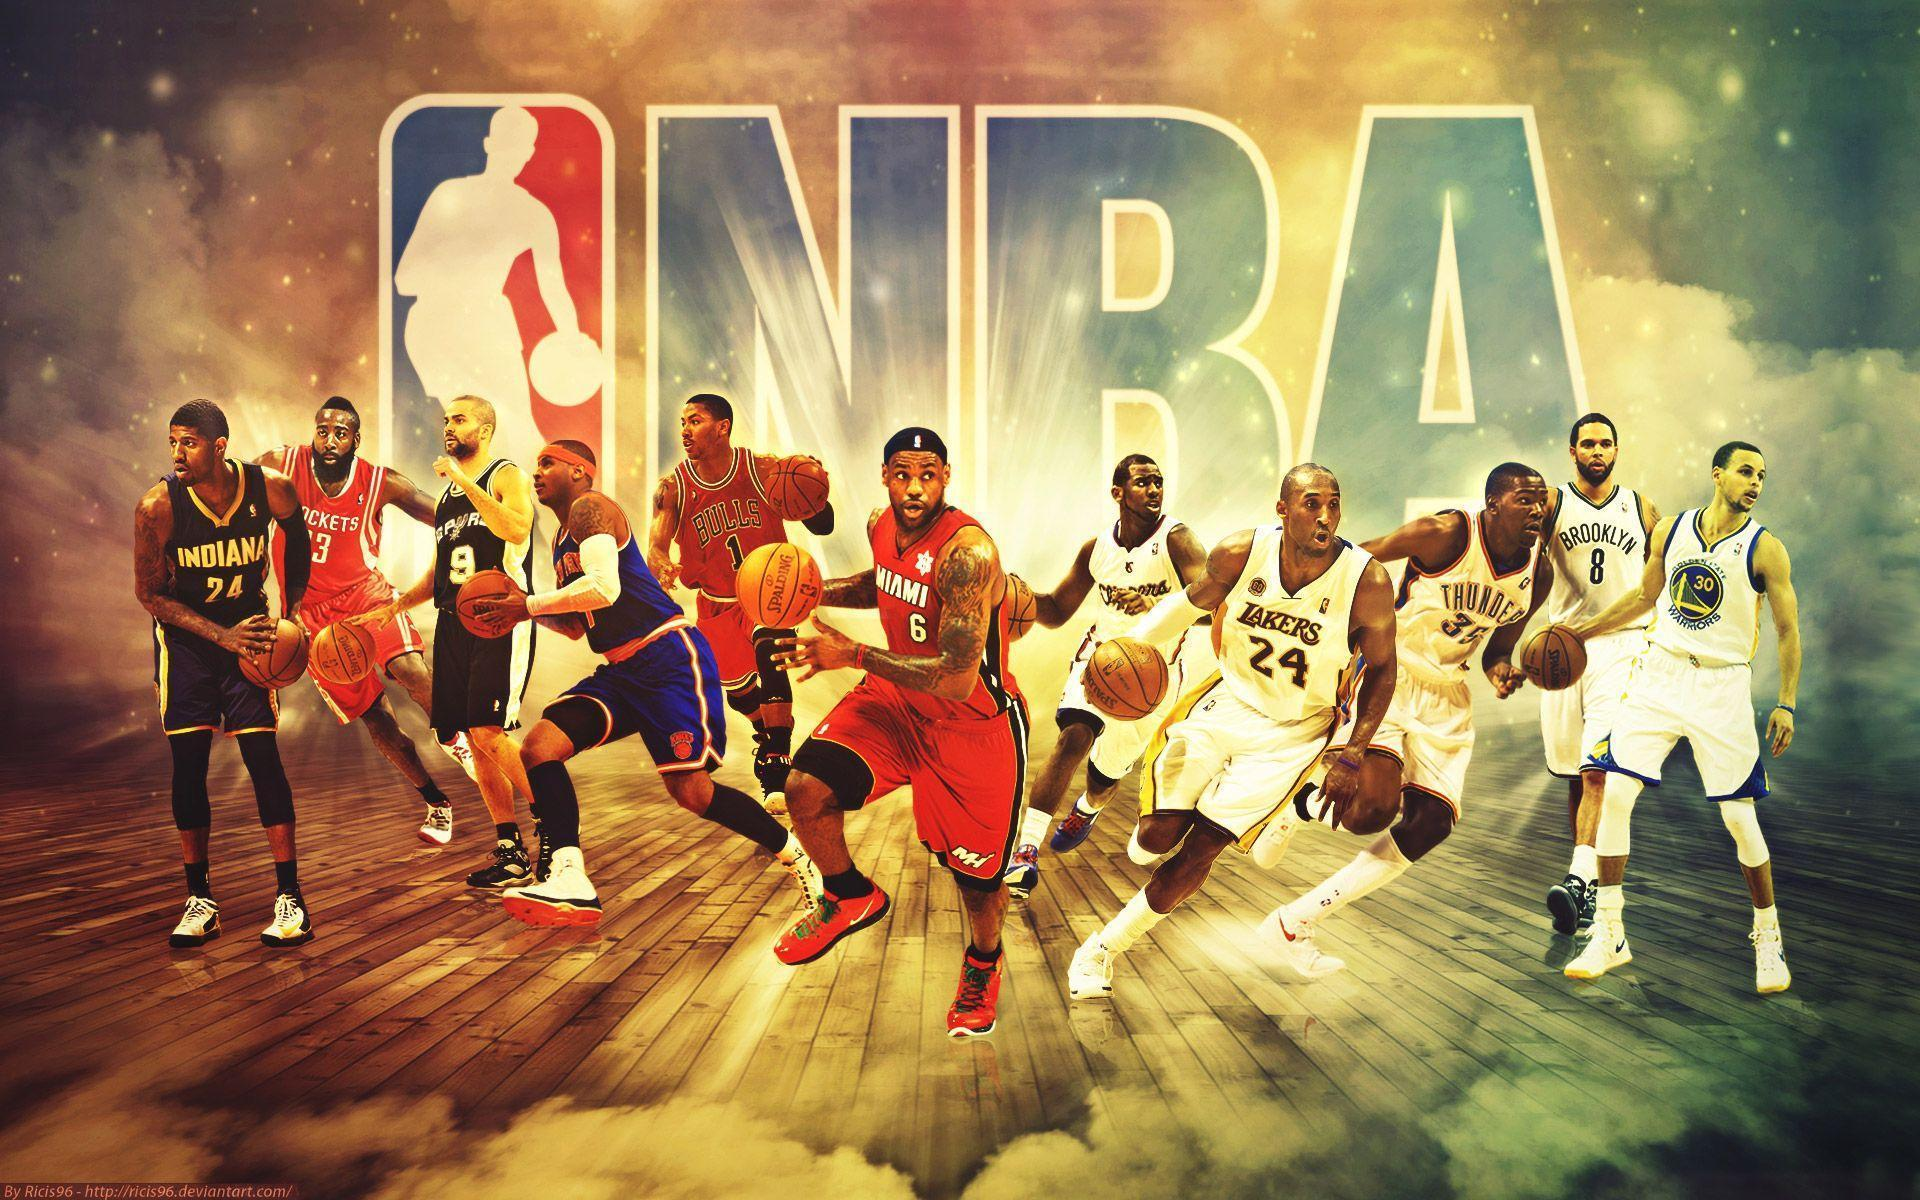

**NBA Veri Seti Nedir?**


> *National Basketball Association* (Türkçe olarak Ulusal Basketbol Birleşimi) veya kısaca NBA, ABD'de kurulmuş profesyonel basketbol ligi organizasyonudur. Tüm dünyada en çok izlenen spor organizasyonlarından biridir. Biz de bugün 2003 ve 2022 yılları arasında yapılmış olan turnuvalar içerisindeki verileri inceleyip,analizler elde edeceğiz.  
 



**Bu Veri Seti Neleri İçeriyor**


> Bu veri seti genel olarak 5 ayrı cvs dosyasından oluşuyor. Bunlar: Takımlar, Oyunlar, Oyun Detayları, Sıralama ve Oyuncu veri setleri. Her bir setin içerisinde bunlar hakkında detaylı bilgiler bulunmakta. 


**Analiz Neden Önemli - Neden Analize Dikkat Etmeliyiz**


> Analiz, karmaşık bir konuyu veya maddeyi daha iyi anlamak için daha küçük parçalara ayırma sürecidir. Biz de özellikle büyük veriler ile uğraştığımız şu günlerde elde ettiğimiz büyük verileri, daha küçüp parçalara indirgeyerek onlar üzerinde anlamlandırmalar yapabiliriz. 

> Özellikle bu projede incelediğimiz NBA datasından örnek vermek gerekirse, tüm dünyadan binlerce insan bu verileri ve çeşitlerini kullanarak, ilerideki maçları veya takımlarını dikkatlice analiz ediyor ve buna göre takımlarını güçlendirmeye çalışıyor.





# Veriyi Elde Etme ve Tanıma

Verisetini hazır bir şekilde aldığımız için veriyi elde etmek için herhangi bir tool kullanmamıza gerek kalmadı. 

Veriyle uğraşmaya başlamadan ve onu analiz etmeden önce veriyi detaylı bir şekilde incelemek en önemli kısımlardan biri bu nedenle ben de öncelikle veriyi tanıyalım. 

Bunun için öncelikle ileride de işimize yarayacak kütüphaneleri import ediyoruz.

In [15]:
#Analiz için kullanmamız gerekn kütüphaneleri import ediyoruz. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Gerekli kütüphaneleri import ettikten sonra verilerimizi okumaya geçiyoruz. 

In [16]:
#Verilerin Okunması

games = pd.read_csv("/content/drive/MyDrive/Final_Project/dataset/games.csv")
games_detail = pd.read_csv("/content/drive/MyDrive/Final_Project/dataset/games_details.csv")
players = pd.read_csv("/content/drive/MyDrive/Final_Project/dataset/players.csv")
ranking = pd.read_csv("/content/drive/MyDrive/Final_Project/dataset/ranking.csv")
teams = pd.read_csv("/content/drive/MyDrive/Final_Project/dataset/teams.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Verilerimizi içeren CVS dosyalarını okuduktan sonra bu dosyaların ilk 5 verisini incelemek için head() metodunu kullandım. 

In [17]:
#DataFramelerdeki ilk 5 veriyi inceleme

print("Oyunlar: \n {}".format(games.head(5)))
print("Oyun Detayları: \n{}".format(games_detail.head(5)))
print("Oyuncular: \n{}".format(players.head(5)))
print("Sıralama: \n{}".format(ranking.head(5)))
print("Takımlar: \n{}".format(teams.head(5)))

Oyunlar: 
   GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0    2022-03-12  22101005            Final    1610612748       1610612750   
1    2022-03-12  22101006            Final    1610612741       1610612739   
2    2022-03-12  22101007            Final    1610612759       1610612754   
3    2022-03-12  22101008            Final    1610612744       1610612749   
4    2022-03-12  22101009            Final    1610612743       1610612761   

   SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
0    2021    1610612748     104.0        0.398        0.760  ...      23.0   
1    2021    1610612741     101.0        0.443        0.933  ...      20.0   
2    2021    1610612759     108.0        0.412        0.813  ...      28.0   
3    2021    1610612744     122.0        0.484        0.933  ...      33.0   
4    2021    1610612743     115.0        0.551        0.750  ...      32.0   

   REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_

Sonrasında da veri setlerinin gözlem sayısını (kaçar tane satır ve sutündan oluştuğunu) incelemek için shape metodundan yararlandım. 

In [18]:
#Veri içerisindeki gözlem sayılarını inceleyelim.

print("Oyunlar verisi, {} satır ve {} sütundan oluşmaktadır. ".format(games.shape[0],games.shape[1]))
print("Oyun Detayları verisi, {} satır ve {} sütundan oluşmaktadır. ".format(games_detail.shape[0],games_detail.shape[1]))
print("Oyuncuları içeren veri seti, {} satır ve {} sütundan oluşmaktadır. ".format(players.shape[0],players.shape[1]))
print("Sıralama verisi, {} satır ve {} sütundan oluşmaktadır. ".format(ranking.shape[0],ranking.shape[1]))
print("Takımları içeren veri seti, {} satır ve {} sütundan oluşmaktadır. ".format(teams.shape[0],teams.shape[1]))


Oyunlar verisi, 25796 satır ve 21 sütundan oluşmaktadır. 
Oyun Detayları verisi, 645953 satır ve 29 sütundan oluşmaktadır. 
Oyuncuları içeren veri seti, 7228 satır ve 4 sütundan oluşmaktadır. 
Sıralama verisi, 201792 satır ve 13 sütundan oluşmaktadır. 
Takımları içeren veri seti, 30 satır ve 14 sütundan oluşmaktadır. 


Veri seti hakkında daha da detaylı bilgi alabilmek için info ile verilerimizi info() metodu ile inceleyelim. 

In [19]:
print("Veri Setleri Hakkında Detaylı Bilgiler: ")
games.info()
games_detail.info()
players.info()
ranking.info()
teams.info()

Veri Setleri Hakkında Detaylı Bilgiler: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25796 entries, 0 to 25795
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25796 non-null  object 
 1   GAME_ID           25796 non-null  int64  
 2   GAME_STATUS_TEXT  25796 non-null  object 
 3   HOME_TEAM_ID      25796 non-null  int64  
 4   VISITOR_TEAM_ID   25796 non-null  int64  
 5   SEASON            25796 non-null  int64  
 6   TEAM_ID_home      25796 non-null  int64  
 7   PTS_home          25697 non-null  float64
 8   FG_PCT_home       25697 non-null  float64
 9   FT_PCT_home       25697 non-null  float64
 10  FG3_PCT_home      25697 non-null  float64
 11  AST_home          25697 non-null  float64
 12  REB_home          25697 non-null  float64
 13  TEAM_ID_away      25796 non-null  int64  
 14  PTS_away          25697 non-null  float64
 15  FG_PCT_away       25697 non-null  float64
 16 

# Veri Seti İçeriğinde Değişiklikler Yapma

Veri setimisi detaylı bir şekilde incelediğimize göre artık veri seti içerisinde değişiklik yapabiliriz. Veri setinin ingilizce olmasından dolayı ve veri seti çok fazla yabancı spor terimi içermesinden dolayı daha analşılır bir şekilde veri setindeki sütunları değiştirdim. 

**GAMES - OYUNLAR**

In [20]:
games.index

RangeIndex(start=0, stop=25796, step=1)

In [21]:
games.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [22]:
games.columns = ['Oyun_Tarihi', 'Oyun_ID', 'Oyun_Durum', 'EvSahibi_ID',
                 'Deplasman_ID', 'Sezon', 'Ev_Takım_ID', 'Ev_Takım_Puan',
                 'Ev_Gol_Yuzdesi', 'Ev_Serbest_Atış','Ev_Uc_Sayı_Yuzdesi', 
                 'Ev_Takım_Asist','Ev_Rebound', 'Deplasman_Takım_ID', 'Deplasman_Puan',
                 'Deplasman_Gol_Yuzdesi', 'Deplasman_Serbest', 'Deplasman_Uc_Sayı_Yuzdesi',
                 'Deplasman_Asist', 'Deplasman_Rebound', 'Ev_Kazanma_Durum'
                 ]

In [23]:
games.tail(5)

,Oyun_Tarihi,Oyun_ID,Oyun_Durum,EvSahibi_ID,Deplasman_ID,Sezon,Ev_Takım_ID,Ev_Takım_Puan,Ev_Gol_Yuzdesi,Ev_Serbest_Atış,...,Ev_Takım_Asist,Ev_Rebound,Deplasman_Takım_ID,Deplasman_Puan,Deplasman_Gol_Yuzdesi,Deplasman_Serbest,Deplasman_Uc_Sayı_Yuzdesi,Deplasman_Asist,Deplasman_Rebound,Ev_Kazanma_Durum
25791,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
25792,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
25793,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
25794,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1
25795,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,...,18.0,42.0,1610612740,98.0,0.462,0.706,0.438,19.0,42.0,0


**GAME DETAILS - OYUN DETAYLARI**




In [24]:
games_detail.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object')

In [25]:
games_detail.columns = ['Oyun_ID', 'Takım_ID', 'Takım_Kısaltma','Takım_Sehir', 
                        'Oyuncu_ID', 'Oyuncu_Ad', 'Oyuncu_Takma_Adı','Baslangıc_Konum',
                        'Yorum', 'Dakika', 'Saha_Gol', 'Gol_Deneme', 'Gol_Puan', 
                        'Ucluk_Atıs','Ucluk_Atıs_Deneme', 'Ucluk_Puan', 'Serbest_Atıs','Serbest_Atıs_Deneme',
                        'Atıs_Yuzde_Puan','Hucum_Rebound','Defans_Rebound','Toplam_Rebound',
                        'Asist','Top_Calma','Engellenen_Atıs','Devir','Oyuncu_Faul',
                        'Oyuncu_Puan' ,'ArtıEksi'
                 ]

In [26]:
games_detail.head(5)

,Oyun_ID,Takım_ID,Takım_Kısaltma,Takım_Sehir,Oyuncu_ID,Oyuncu_Ad,Oyuncu_Takma_Adı,Baslangıc_Konum,Yorum,Dakika,...,Hucum_Rebound,Defans_Rebound,Toplam_Rebound,Asist,Top_Calma,Engellenen_Atıs,Devir,Oyuncu_Faul,Oyuncu_Puan,ArtıEksi
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0


**TEAMS - TAKIMLAR**

In [27]:
teams.columns

Index(['LEAGUE_ID', 'TEAM_ID', 'MIN_YEAR', 'MAX_YEAR', 'ABBREVIATION',
       'NICKNAME', 'YEARFOUNDED', 'CITY', 'ARENA', 'ARENACAPACITY', 'OWNER',
       'GENERALMANAGER', 'HEADCOACH', 'DLEAGUEAFFILIATION'],
      dtype='object')

In [28]:
teams.columns = ['Lig_ID', 'Takım_ID', 'Min_Yıl', 'Max_Yıl',
                 'Takım_Kısaltma', 'TakmaAd', 'Kurulus', 'Sehir',
                 'Arena', 'Arena_Kapasite','Sahibi', 'Genel_Mudur',
                 'Bas_Antrenor', 'D_Lig_Iliskisi']      

In [29]:
teams.head(5)

,Lig_ID,Takım_ID,Min_Yıl,Max_Yıl,Takım_Kısaltma,TakmaAd,Kurulus,Sehir,Arena,Arena_Kapasite,Sahibi,Genel_Mudur,Bas_Antrenor,D_Lig_Iliskisi
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


**PLAYERS - OYUNCULAR**

In [30]:
players.columns

Index(['PLAYER_NAME', 'TEAM_ID', 'PLAYER_ID', 'SEASON'], dtype='object')

In [31]:
players.columns = ['Oyuncu_Ad', 'Takım_ID', 'Oyuncu_ID', 'Sezon']      

In [32]:
players.head(5)

,Oyuncu_Ad,Takım_ID,Oyuncu_ID,Sezon
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


**RANKING - SIRALAMA**

In [33]:
ranking.columns

Index(['TEAM_ID', 'LEAGUE_ID', 'SEASON_ID', 'STANDINGSDATE', 'CONFERENCE',
       'TEAM', 'G', 'W', 'L', 'W_PCT', 'HOME_RECORD', 'ROAD_RECORD',
       'RETURNTOPLAY'],
      dtype='object')

In [34]:
ranking.columns = ['Takım_ID', 'Lig_ID', 'Sezon_ID',
                 'Puan_Tarih', 'Konferans', 'Takım',
                 'Sezon_Mac_S', 'Sezon_Kazanılan','Sezon_Kaybedilen',
                 'Kazanc', 'Ev_Rekor', 'Yol_Rekor', 'OyunDonus']  

In [35]:
ranking.head(5)

,Takım_ID,Lig_ID,Sezon_ID,Puan_Tarih,Konferans,Takım,Sezon_Mac_S,Sezon_Kazanılan,Sezon_Kaybedilen,Kazanc,Ev_Rekor,Yol_Rekor,OyunDonus
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,NaN
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,NaN




---



**Veri İçerisinde Farklı Kaç Sezon Var**

In [36]:
games['Sezon'].nunique()

19

Veri içerisindeki analizde kullanacağım kısımlardaki boş ne NaN değerleri doldurmak önemli olduğu için eams DataFramindeki - Arena Kapasite kolonundaki NaN değerleri Arena Kapasitesi ortalaması ile doldurdum. Böylece arena kapasitesi ile ileride çalışıldığında outlier değerler analizimizi etkileyemecektir. 

In [37]:
#Teams DataFramindeki - Arena Kapasite kolonundaki NaN değerleri Arena Kapasitesi ortalaması ile doldurdum.
teams['Arena_Kapasite'] = teams['Arena_Kapasite'].fillna(teams['Arena_Kapasite'].mean())

teams['Arena_Kapasite'] = teams['Arena_Kapasite'].replace(teams['Arena_Kapasite'].mean(), 0)
teams['Arena_Kapasite'] = teams['Arena_Kapasite'].replace(teams['Arena_Kapasite'].mean(), 0.0)

# Filtreleme, Sıralama ve Analiz

Bu kısımda veriler hakkında elde ettiğim analizler ve sıralama sonuçları bulunuyor. 
 

**Sezonlara Göre Oyun Sayısı**

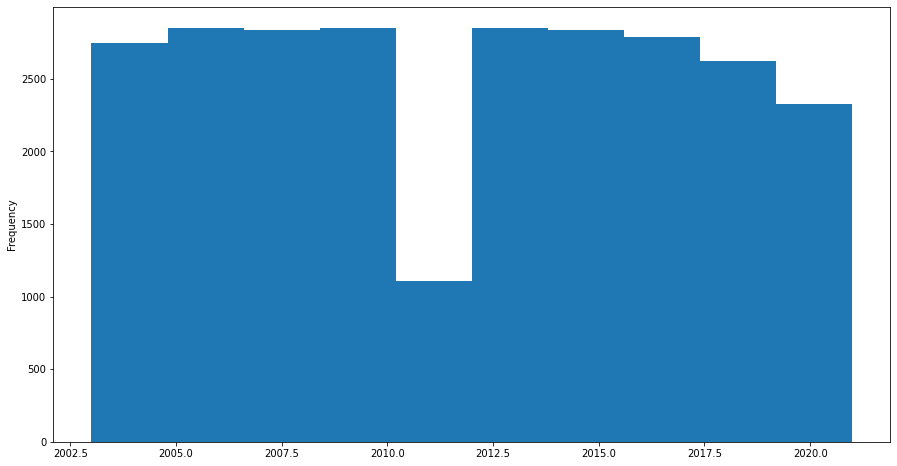

In [38]:
games['Sezon'].plot.hist(figsize=(15,8))

**Şehirlere Göre Takım Sayıları**

In [39]:
teams.groupby("Sehir").size()

Sehir
Atlanta          1
Boston           1
Brooklyn         1
Charlotte        1
Chicago          1
Cleveland        1
Dallas           1
Denver           1
Detroit          1
Golden State     1
Houston          1
Indiana          1
Los Angeles      2
Memphis          1
Miami            1
Milwaukee        1
Minnesota        1
New Orleans      1
New York         1
Oklahoma City    1
Orlando          1
Philadelphia     1
Phoenix          1
Portland         1
Sacramento       1
San Antonio      1
Toronto          1
Utah             1
Washington       1
dtype: int64

In [40]:
teams.groupby('Arena_Kapasite').size()

Arena_Kapasite
0.0        5
17500.0    2
18104.0    1
18119.0    1
18345.0    1
18624.0    1
18694.0    1
18729.0    1
19026.0    1
19060.0    2
19099.0    1
19163.0    1
19200.0    1
19356.0    1
19596.0    1
19600.0    1
19763.0    1
19800.0    1
19980.0    1
20148.0    1
20562.0    1
20647.0    1
21000.0    1
21711.0    1
dtype: int64

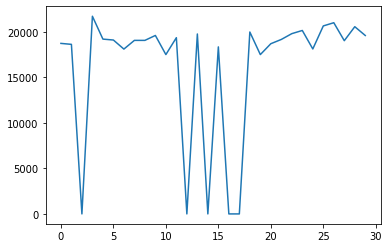

In [42]:
teams['Arena_Kapasite'].plot()

**Ev Sahibinin Kazanma Durumuna Göre Ev Sahibi ID'leri**

In [41]:
games[(games["Ev_Kazanma_Durum"] == 1)]["EvSahibi_ID"].value_counts

<bound method IndexOpsMixin.value_counts of 1        1610612741
3        1610612744
5        1610612762
6        1610612757
7        1610612753
            ...    
25788    1610612758
25790    1610612738
25791    1610612737
25793    1610612747
25794    1610612761
Name: EvSahibi_ID, Length: 15155, dtype: int64>

**Kazanan Takımın Ev Sahibi Olması Kazanmasını Ne Oranda Etkiliyor?**

In [43]:
Mac_Sayısı = games['Ev_Kazanma_Durum'].count()
Evsahibi_Kazanmıs = games[(games["Ev_Kazanma_Durum"] == 1)].value_counts()

print(Mac_Sayısı)
print(Evsahibi_Kazanmıs)

25796
Oyun_Tarihi  Oyun_ID   Oyun_Durum  EvSahibi_ID  Deplasman_ID  Sezon  Ev_Takım_ID  Ev_Takım_Puan  Ev_Gol_Yuzdesi  Ev_Serbest_Atış  Ev_Uc_Sayı_Yuzdesi  Ev_Takım_Asist  Ev_Rebound  Deplasman_Takım_ID  Deplasman_Puan  Deplasman_Gol_Yuzdesi  Deplasman_Serbest  Deplasman_Uc_Sayı_Yuzdesi  Deplasman_Asist  Deplasman_Rebound  Ev_Kazanma_Durum
2003-10-05   10300001  Final       1610612762   1610612742    2003   1610612762   90.0           0.457           0.735            0.143               23.0            41.0        1610612742          85.0            0.447                  0.500              0.250                      20.0             38.0               1                   1
2015-11-21   21500191  Final       1610612739   1610612737    2015   1610612739   109.0          0.482           0.842            0.379               27.0            51.0        1610612737          97.0            0.372                  0.880              0.393                      22.0             38.0             

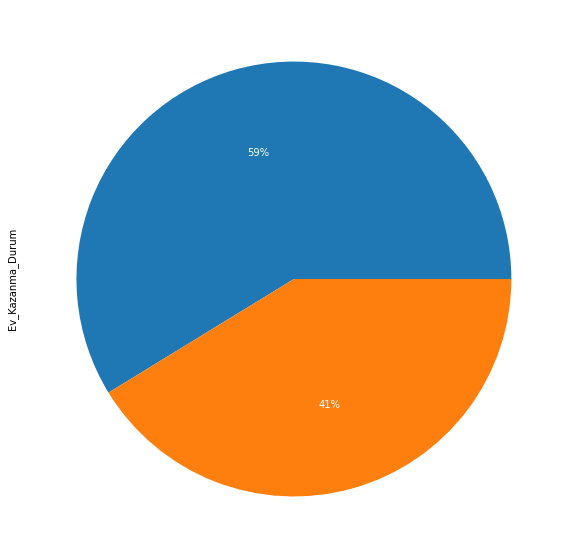

In [44]:
games['Ev_Kazanma_Durum'].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10), textprops={'color':"w"})

**Veri Seti Hangi Yılar Arasındaki Maçları İçeriyor - Yıllar içerisinde kaç Maç Yapılmış**

In [45]:
min = games['Oyun_Tarihi'].min()
max = games['Oyun_Tarihi'].max()
print("Veri seti içerisindeki ilk maç {} tarihinde, son maç ise {} tarihinde gerçekleşmiştir.".format(min,max))

Veri seti içerisindeki ilk maç 2003-10-05 tarihinde, son maç ise 2022-03-12 tarihinde gerçekleşmiştir.


**En Çok Maç Kazanmış Grup 5 Grup**

In [46]:
c= games_detail.groupby('Takım_ID')
c = c.sum()
c = c.sort_values(['Saha_Gol'], ascending=False)
c.head(5)

,Oyun_ID,Oyuncu_ID,Saha_Gol,Gol_Deneme,Gol_Puan,Ucluk_Atıs,Ucluk_Atıs_Deneme,Ucluk_Puan,Serbest_Atıs,Serbest_Atıs_Deneme,...,Hucum_Rebound,Defans_Rebound,Toplam_Rebound,Asist,Top_Calma,Engellenen_Atıs,Devir,Oyuncu_Faul,Oyuncu_Puan,ArtıEksi
Takım_ID,,,,,,,,,,,,,,,,,,,,,
1610612759,522891058182,6887283490,69779.0,149301.0,8715.635,14469.0,38747.0,4199.782,31085.0,40889.0,...,18069.0,59707.0,77776.0,41503.0,13167.0,9354.0,23529.0,34844.0,185112.0,42069.0
1610612744,481521089818,7024085078,69410.0,149486.0,8012.467,17144.0,45910.0,3743.073,30832.0,40403.0,...,18464.0,56896.0,75360.0,42891.0,14572.0,9381.0,25180.0,37980.0,186796.0,19177.0
1610612747,497463662837,6644913453,68046.0,149065.0,7802.820,14181.0,40824.0,3835.988,33308.0,44917.0,...,19742.0,57902.0,77644.0,39961.0,13535.0,8870.0,25172.0,37212.0,183583.0,1776.0
1610612756,461341317750,8563485454,67607.0,144660.0,7452.663,15048.0,41260.0,3871.290,30408.0,39448.0,...,17743.0,54650.0,72393.0,39403.0,12781.0,8282.0,24438.0,36327.0,180670.0,2884.0
1610612738,514062713255,9098837297,67529.0,147678.0,8078.226,14824.0,41680.0,3827.705,32934.0,42663.0,...,17971.0,57778.0,75749.0,40930.0,14461.0,8567.0,25605.0,39671.0,182816.0,19147.0


**Hangi Şehirde daha çok takım var**

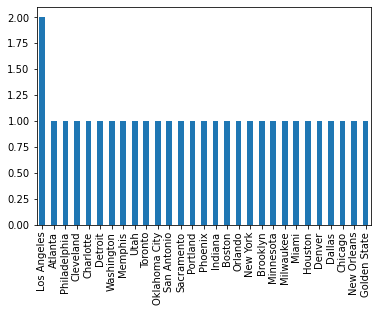

In [47]:
teams['Sehir'].value_counts().plot.bar()

**Sezonlara Göre Ev Takımının Aldığı Ortalama Puanlar**

Sezonlara Göre Ev Sahibi Takımın Aldığı Puanların Ortalaması: 

Sezon
2003     94.907465
2004     98.604993
2005     98.406425
2006     99.849190
2007    101.273565
2008    100.922807
2009    101.654494
2010    100.756681
2011     97.392210
2012     99.381690
2013    101.735109
2014    101.095205
2015    103.712571
2016    106.916014
2017    107.219971
2018    112.301887
2019    112.274778
2020    112.375500
2021    110.549257
Name: Ev_Takım_Puan, dtype: float64

Sezonlara Göre Ev Sahibi Takımlarının Ortalama Puanlarındaki Artış Grafiği: 



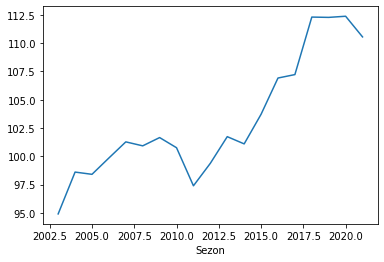

In [48]:
print("Sezonlara Göre Ev Sahibi Takımın Aldığı Puanların Ortalaması: \n")
print(games.groupby('Sezon').Ev_Takım_Puan.mean())
print("\nSezonlara Göre Ev Sahibi Takımlarının Ortalama Puanlarındaki Artış Grafiği: \n")
games.groupby('Sezon').Ev_Takım_Puan.mean().plot()

**Kuruluş Yıllarına Göre Takımlar Grafiği**

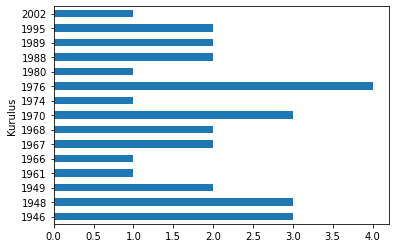

In [49]:
teams.groupby('Kurulus').size().plot.barh()

**Belirli Bir Takımın Sezon Başarı Oranını Ölçen Fonksiyon**

In [50]:
def Sezon_Basarı_oranı(x,y):
  if x>y:
    print("Sezon Basarılı!\n")
    print("Yüzdelik Oran: {} ".format((100*x)/(x+y)))
  else:
    print("Sezon Basarısız!")
    print("Yüzdelik Oran: {} ".format((100*x)/(x+y)))

sezon_w = ranking['Sezon_Kazanılan'][5].sum()
sezon_l = ranking['Sezon_Kaybedilen'][5].sum()

Sezon_Basarı_oranı(sezon_w,sezon_l)

Sezon Basarılı!

Yüzdelik Oran: 58.8235294117647 


**Sezonlara Göre Ev Sahibi Takımın Kazanma Oranı**

In [51]:
games.groupby('Sezon')['Ev_Kazanma_Durum'].value_counts()

Sezon  Ev_Kazanma_Durum
2003   1                   800
       0                   585
2004   1                   824
       0                   538
2005   1                   866
       0                   566
2006   1                   839
       0                   580
2007   1                   862
       0                   549
2008   1                   857
       0                   568
2009   1                   857
       0                   567
2010   1                   871
       0                   551
2011   1                   656
       0                   448
2012   1                   872
       0                   548
2013   1                   819
       0                   608
2014   1                   816
       0                   602
2015   1                   841
       0                   575
2016   1                   816
       0                   589
2017   1                   805
       0                   577
2018   1                   810
       0       

**Ev Sahibi Takımın Asistlerine Göre Kazanma Durumu**

In [52]:
games.groupby('Ev_Takım_Asist')['Ev_Kazanma_Durum'].value_counts()

Ev_Takım_Asist  Ev_Kazanma_Durum
6.0             0                    2
7.0             0                    7
8.0             0                   12
                1                    3
9.0             0                   18
                                    ..
43.0            1                    1
44.0            1                    1
45.0            1                    1
47.0            1                    1
50.0            1                    1
Name: Ev_Kazanma_Durum, Length: 74, dtype: int64

**Birbiriyle İlişkili Kısımları Gösterme**

- Oyuncular Verisi içerisindeki Korelasyon'u gösteren Heatmap

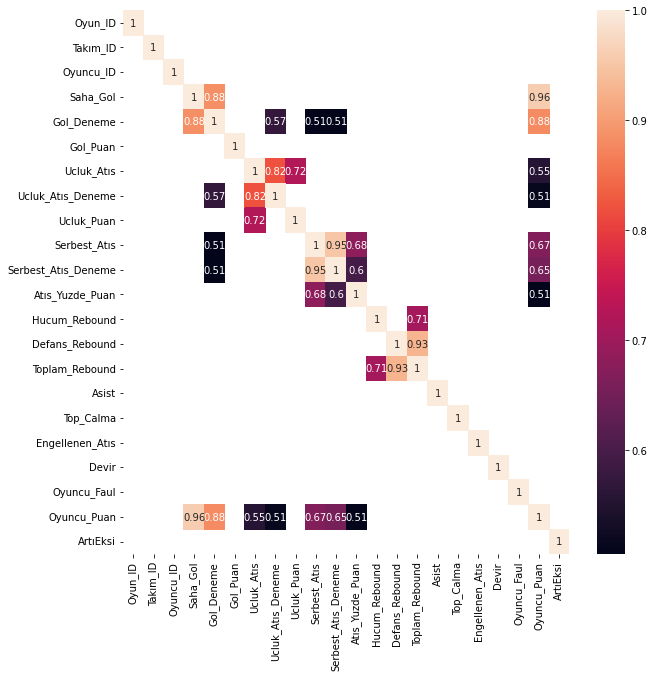

In [53]:
#Oyuncu detayları arasındaki farklar
plt.figure(figsize=(10,10))

corr = games_detail.corr()
corr = corr[abs(corr) > 0.5]

sns.heatmap(corr, annot=True)

**Oyunlar Verisi içerisindeki Korelasyon'u gösteren Heatmap**

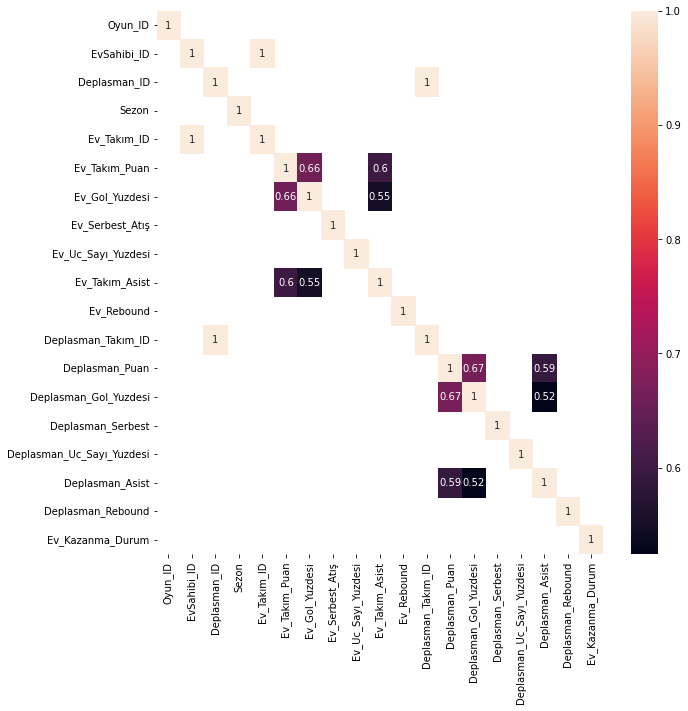

In [54]:
plt.figure(figsize=(10,10))

corr = games.corr()
corr = corr[abs(corr) > 0.5]

sns.heatmap(corr, annot=True)

**İki Veri Setinin Birleştirilmesi**

In [60]:
df_new1 = pd.DataFrame({"Oyun_ID" : games['Oyun_ID'].head(10) , 
                    "EvSahibi_ID" : games["EvSahibi_ID"].head(10) , 
                    "Deplasman_ID" : games["Deplasman_ID"].head(10)})

df_new2 = pd.DataFrame({"EvSahibi_ID" : ranking["Takım_ID"].head(10), 
                    "EvSahibi_Takım" : ranking["Takım"].head(10) })

new = df_new1.merge(df_new2  , on = "EvSahibi_ID")
new

,Oyun_ID,EvSahibi_ID,Deplasman_ID,EvSahibi_Takım
0,22101008,1610612744,1610612749,Golden State
1,22101009,1610612743,1610612761,Denver
2,22101010,1610612762,1610612758,Utah
